In [1]:
!pip install easyocr

     --------------------------------------- 70.8/70.8 MB 46.7 MB/s eta 0:00:00
     --------------------------------------- 35.0/35.0 MB 65.6 MB/s eta 0:00:00
     ---------------------------------------- 153.2/153.2 kB ? eta 0:00:00


In [3]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25879 sha256=e631eaa25d8b10e709e4add11320a3015df720ef2f7292f760b02595525785ea
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [2]:
!pip install timm

     ------------------------------------- 510.0/510.0 kB 16.1 MB/s eta 0:00:00


In [5]:
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [6]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 
 
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
    image_list_title = []
    image_list = []
 
    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])
 
    # 이미지를 grayscale로 변환하고 blur를 적용
    # 모서리를 찾기위한 이미지 연산
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)
 
    image_list_title = ['gray', 'blurred', 'edged']
    image_list = [gray, blurred, edged]
 
    # contours를 찾아 크기순으로 정렬
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
    findCnt = None
 
    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    plt_imshow(image_list_title, image_list)


In [7]:
def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=22):
    font = ImageFont.truetype('C:/Windows/Fonts/gulim.ttc', font_size)
    img = Image.fromarray(cv_img)
   
    draw = ImageDraw.Draw(img)
#     draw.text((x, y), text, font=font, fill=color)
 
    cv_img = np.array(img)
  
    return cv_img

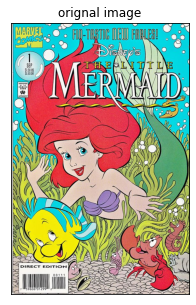

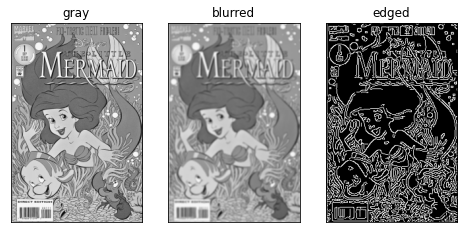

[INFO] OCR'ing input image...


In [8]:
path = 'C:/Users/HP/Desktop/meta_gpu/8pj/image-editing/images/cartoon2.jpg'

with open(path, 'rb') as f:
    data =f.read()

image_nparray = np.asarray(bytearray(data), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
plt_imshow("orignal image", org_image)
 
box_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

langs = ['ko', 'en']
 
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(org_image)

In [9]:
# loop over the results
for (bbox, text, prob) in results:
    print("[INFO] {:.4f}: {}".format(prob, text))
  
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
 
    # 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
    cv2.rectangle(org_image, tl, br, (0, 0, 0), -1)
    box_image = putText(org_image, text, tl[0], tl[1] - 60, (0, 255, 0), 50)
#     cv2.putText(box_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.0405: MaRV틱F
[INFO] 0.0017: TPIm-TmaTIG mEUI F@mE뼈
[INFO] 0.0156: 호땅c
[INFO] 0.2300: Nil
[INFO] 0.4095: BEP
[INFO] 0.2872: 7 fE
[INFO] 0.0586: -
[INFO] 0.0194: 피하 피
[INFO] 0.0227: 입되다
[INFO] 0.0826: MERW-IID
[INFO] 0.6168: DIRECT
[INFO] 0.7979: EDITIoH


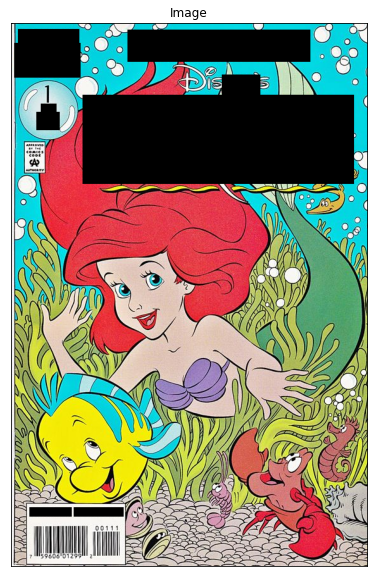

In [10]:
plt_imshow("Image", box_image, figsize=(16,10))

In [69]:
box_image = cv2.cvtColor(box_image, cv2.COLOR_BGR2RGB)

In [70]:
from pathlib import Path

import numpy as np
import torch
from PIL import Image
from timm.models.hub import download_cached_file
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from matplotlib import pyplot as plt

MODEL_URL = "https://github.com/Boram3J/image-editing/releases/download/inpainting/big-lama-344c77bb.pt"


def load_model(device="cpu", progress=True):
    model_path = download_cached_file(MODEL_URL, progress=progress)
    model = torch.jit.load(model_path, map_location="cpu")
    model.to(device)
    model.eval()
    return model


def load_images(size=(256, 384)):
    imgs = [Image.fromarray(box_image)]
    if size is not None:
        imgs = imgs = [img.resize(size, Image.Resampling.LANCZOS) for img in imgs]
    print(type(imgs))
    return imgs


torch.manual_seed(1)

<class 'list'>
---- <class 'list'>


Text(0.5, 1.0, 'Original Images')

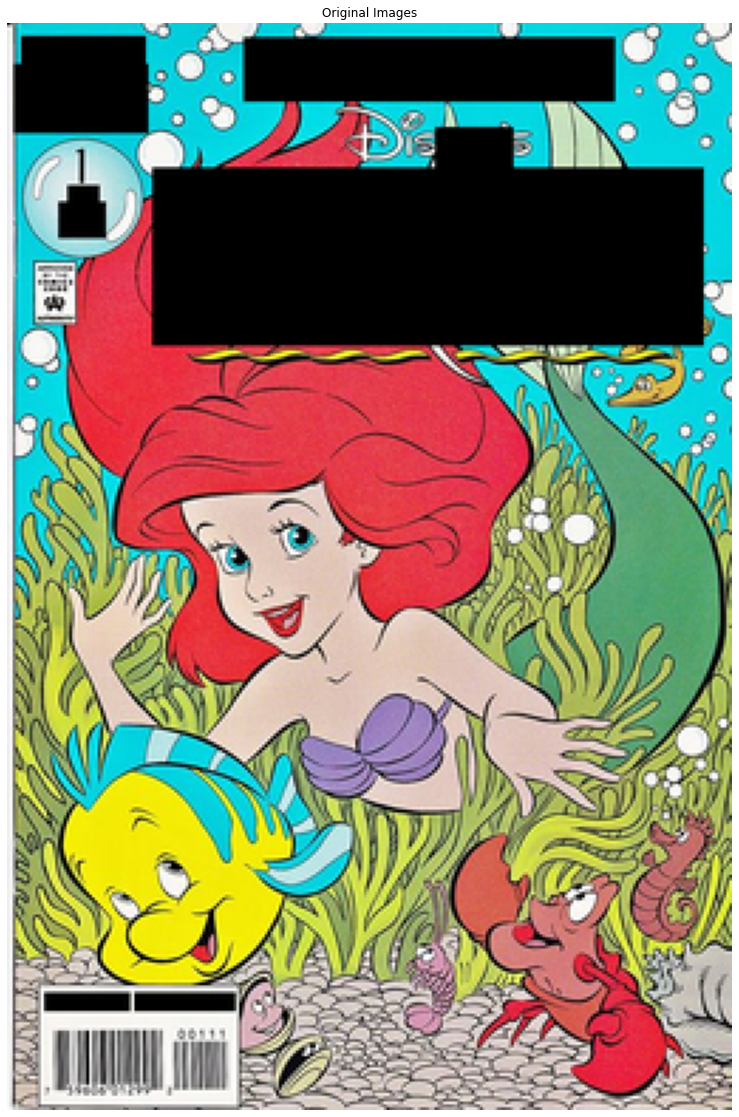

In [71]:
imgs = load_images()
print("----",type(imgs))
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack([np.asarray(img) for img in imgs]))
plt.axis("off")
plt.title("Original Images")

Text(0.5, 1.0, 'Erased Images')

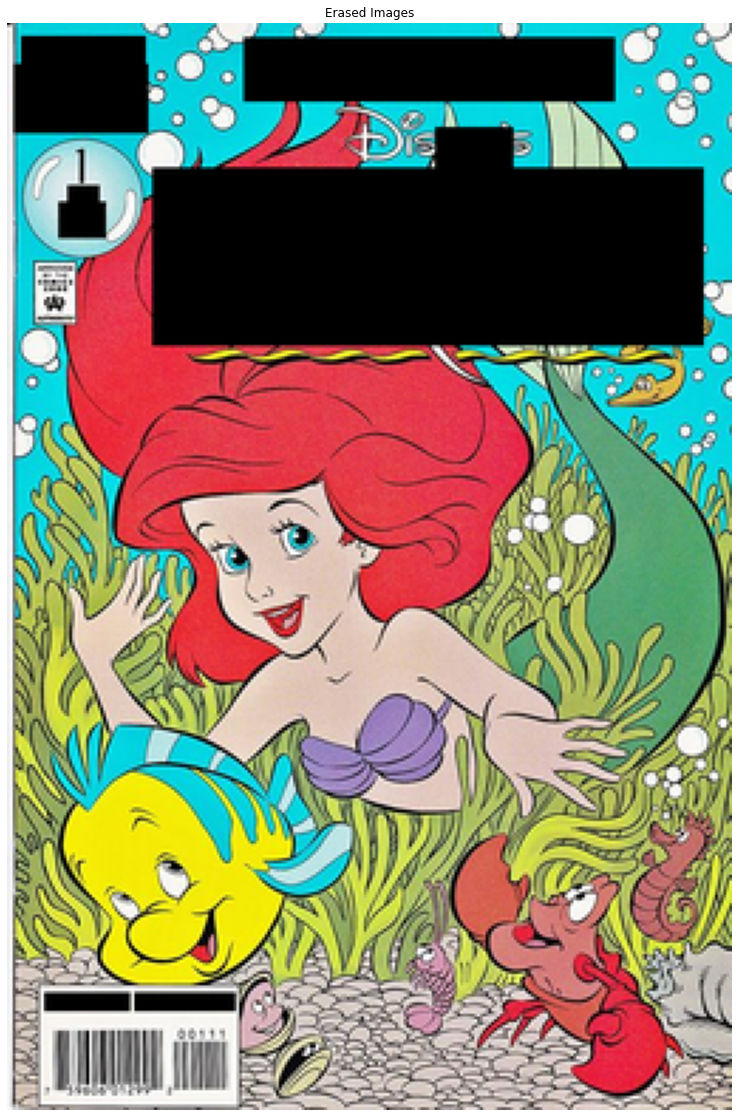

In [72]:
transform = transforms.Compose(
    [
        transforms.PILToTensor(),
        transforms.ConvertImageDtype(torch.float),
    ]
)
erased = [transform(img) for img in imgs]
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack([np.asarray(to_pil_image(img)) for img in erased]))
plt.axis("off")
plt.title("Erased Images")


Text(0.5, 1.0, 'Inpainted Images')

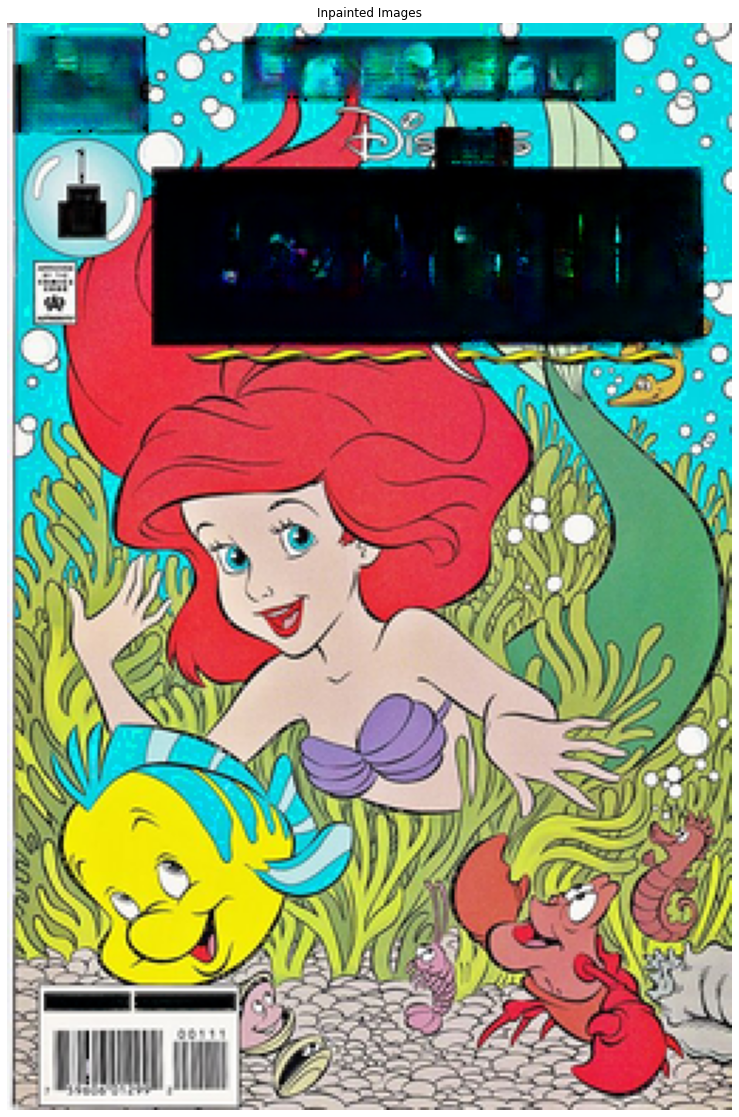

In [78]:
device = "cpu"
model = load_model(device=device)
inp = torch.stack(erased, dim=0).to(device)
msk = inp[:, :1] < torch.finfo(inp.dtype).eps
with torch.inference_mode():
    out = model(inp, msk.long()).cpu()
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack([np.asarray(to_pil_image(img)) for img in out]))
plt.axis("off")
plt.title("Inpainted Images")


In [95]:
tmp = [Image.fromarray(np.asarray(to_pil_image(img))) for img in out]


Text(0.5, 1.0, 'Inpainted Images')

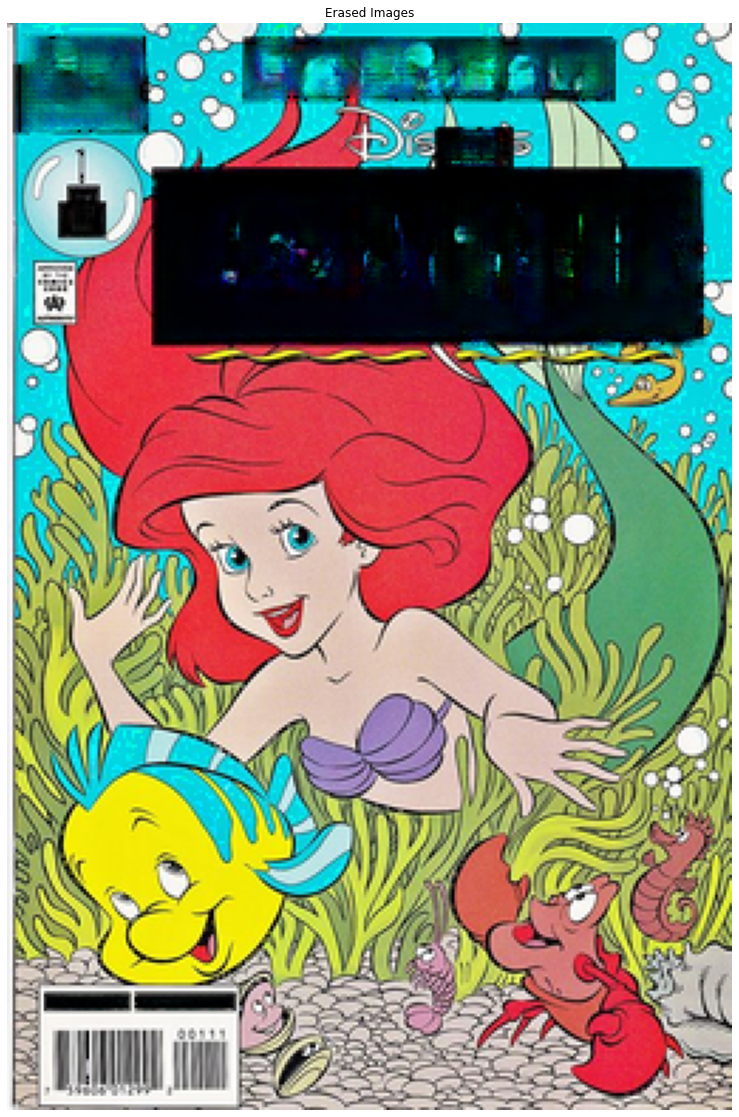

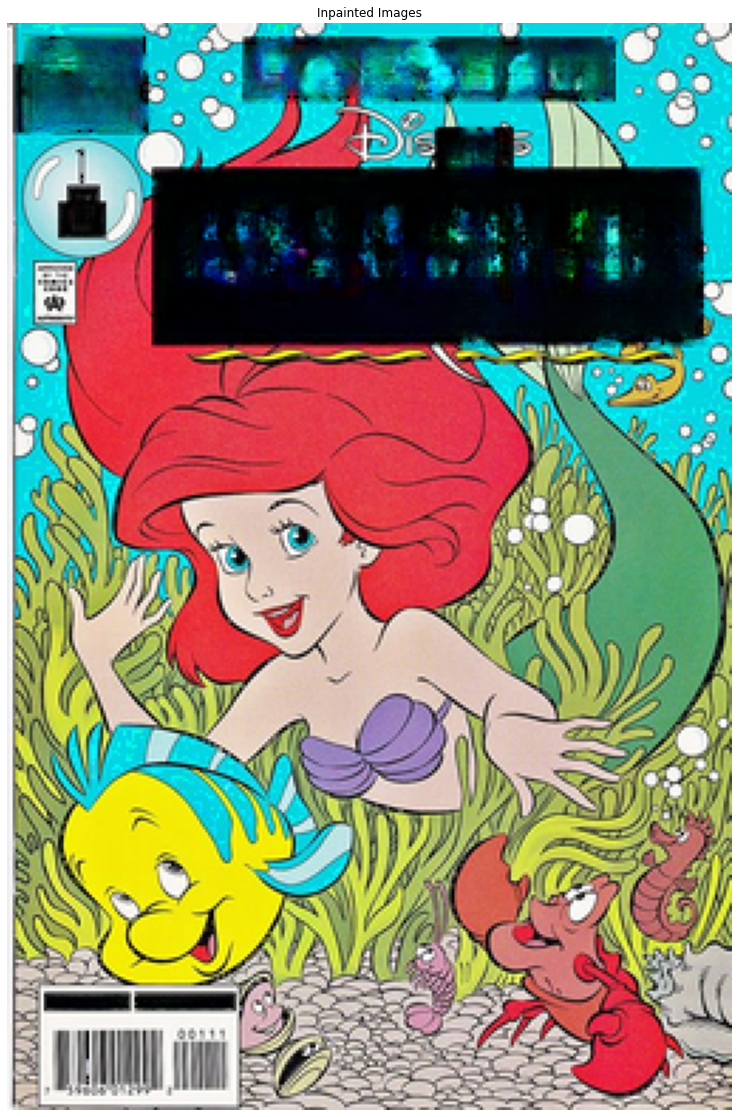

In [98]:
transform = transforms.Compose(
    [
        transforms.PILToTensor(),
        transforms.ConvertImageDtype(torch.float),
    ]
)
erased2 = [transform(img) for img in tmp]
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack([np.asarray(to_pil_image(img)) for img in erased2]))
plt.axis("off")
plt.title("Erased Images")

inp = torch.stack(erased2, dim=0).to(device)
msk = inp[:, :1] < torch.finfo(inp.dtype).eps
with torch.inference_mode():
    out = model(inp, msk.long()).cpu()
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack([np.asarray(to_pil_image(img)) for img in out]))
plt.axis("off")
plt.title("Inpainted Images")